# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [1]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y!)$ in your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

You get a `inf` error because you cannot take the log of a number less than or equal to 0. It is undefined.

In [2]:
def poissonNegLogLikelihood(lam,y):
    
    # Read up on the gamma function to make sure you get the likelihood right!
    neg_array = (y * np.log(lam) - lam - gammaln(y+1)) * -1
    neg_log_lik = np.sum(neg_array)
    return neg_log_lik

# Testing function
lam = 1.3
y = np.array([2,1,0,0])
print(poissonNegLogLikelihood(lam,y))

# Testing function with lambda as an array
lam=np.array([1,0.5,1,3])
y=np.array([2,1,0,0])
print(poissonNegLogLikelihood(lam,y))

5.106054387157472
6.886294361119891


---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [3]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X,b))
    
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam, y)
    return neg_log_lik

# Testing function
b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
print(poissonRegressionNegLogLikelihood(b, X, y))

3227.581865000517


### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---

a) Because we're taking the log of lambda, we need lambda to be a positive number and the exponential function is positive on its whole domain. Moreover, lambda must be a positive number by definition of the Poisson distribution being one for counts (which of course cannot be negative). Thus, it would have been impossible to calculate likelihood.

b) Our predictor variables in X could be over a domain that extends into the negatives and positives. Thus, X * Beta could be negative, which would not be consistent with the Poisson lambda parameter.


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [4]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X,b))
    return yhat

# Testing function.
b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
print(modelPrediction(b,X))


[ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [5]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.repeat(1, X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y))
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.

X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
print("Estimated beta:",fitModel(X,y))

Estimated beta: [ 0.94827559 -0.52953525]


### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

Text(0, 0.5, 'y')

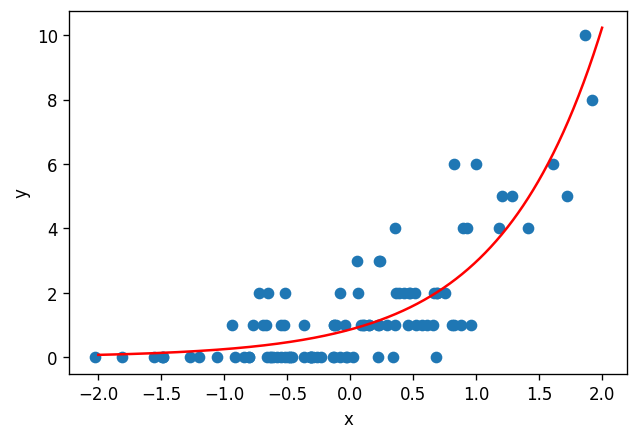

In [6]:
# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv")

fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
ax.scatter(df["x"], df["y"])

# Fit the model.  Use your functions.  
x = df["x"]
X = np.c_[np.repeat(1, len(x)),x]
y= df["y"]

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X, y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.repeat(1, len(newx)),newx]

# Make predictions on the new data
y_predicted=modelPrediction(betas, newX)

#Finally, plot the predictions on the same axis and color the predictions red
ax.plot(newx, y_predicted, color="r")
ax.set_xlabel("x")
ax.set_ylabel("y")


### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


Text(0, 0.5, 'y')

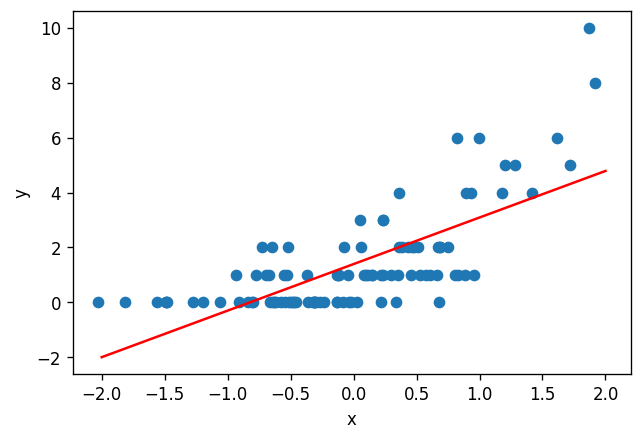

In [8]:
# Hint: Very similar to the previous assignment
# Read in the data
df = pd.read_csv("poisson_regression_data.csv")
x = df["x"]
X = np.c_[np.repeat(1, len(x)),x]
y= df["y"]

# fit the model
ols_fit = linear_model.LinearRegression().fit(X,y)

# Make predictions over the range -2 to 2
newx = np.c_[np.linspace(-2,2,1001)]
newX = np.c_[np.repeat(1,len(newx)), newx]
y_hat = ols_fit.predict(newX)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
ax.scatter(df["x"], df["y"])
ax.plot(newx, y_hat, color="r")
ax.set_xlabel("x")
ax.set_ylabel("y")


### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

The first major problem with this prediction is the fact that it can provide negative prediction values. In reality the count of occurrences for an event cannot be negative, and these predictions would be nonsensical. The other major problem with this prediction is that it attempts to fit a linear model to data that is clearly non-linear. Because the data grows exponentially, the residuals would grow more and more negative as the predicted value increases.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.